In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from src.data.load_dataset import load_lumc_outcomes, normalise_dataset_per_barcode

In [3]:
# takes about 6 minutes to load the data into memory
df_raw = load_lumc_outcomes()

/Users/colm/repos/MUSICian/src/data/load_dataset.py:80: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  totals = df_idx[["fraction_per_barcode"]].sum(level=["Target", "Alias", "Gene", "Barcode"])


Normalised per Gene


In [4]:
df = df_raw
df.groupby("Barcode").sum().head()

,fraction_per_barcode,del_len,countEvents
Barcode,,,
0610009B22Rik-1,6.0,3087,16651
0610009B22Rik-2,6.0,3832,22175
0610009B22Rik-3,6.0,4133,23309
0610009B22Rik-4,6.0,4154,29419
0610009B22Rik-5,6.0,3068,19098


In [5]:
df.groupby(["Alias", "Gene"]).size().groupby(["Alias"]).size()

Alias
MB01    18406
MB02    18405
MB03    18406
MB04    18406
MB05    18406
MB06    18406
dtype: int64

In [6]:
df.groupby(["Alias", "Barcode"]).size().groupby(["Alias"]).size()

Alias
MB01    89414
MB02    89423
MB03    89492
MB04    89481
MB05    89477
MB06    89478
dtype: int64

In [7]:
df.groupby(["Alias", "Barcode"]).size().groupby(["Alias"]).size()

Alias
MB01    89414
MB02    89423
MB03    89492
MB04    89481
MB05    89477
MB06    89478
dtype: int64

In [8]:
df.groupby(["Alias"]).sum()

,fraction_per_barcode,del_len,countEvents
Alias,,,
MB01,89414.0,41063864,177511489
MB02,89423.0,41022200,190921210
MB03,89492.0,41945223,246015882
MB04,89481.0,37415740,288323544
MB05,89477.0,39970251,215492362
MB06,89478.0,40827134,207035133


In [9]:
df["class"] = df["lumc_category"] + ", " + df["del_len"].astype(str)
df.head()

fraction_per_barcode  \
Target Alias Gene          Barcode                                 
T1     MB01  0610009B22Rik 0610009B22Rik-1              0.056075   
                           0610009B22Rik-1              0.001780   
                           0610009B22Rik-1              0.013351   
                           0610009B22Rik-1              0.002225   
                           0610009B22Rik-1              0.024477   

                                                lumc_category  del_len  \
Target Alias Gene          Barcode                                       
T1     MB01  0610009B22Rik 0610009B22Rik-1  1bp insertion - A        0   
                           0610009B22Rik-1  1bp insertion - C        0   
                           0610009B22Rik-1  1bp insertion - G        0   
                           0610009B22Rik-1  1bp insertion - T        0   
                           0610009B22Rik-1     >1bp insertion        0   

                                            countEvents                 class  
Target Alias Gene          Barcode                                             
T1     MB01  0610009B22Rik 0610009B22Rik-1          126  1bp insertion - A, 0  
                           0610009B22Rik-1            4  1bp insertion - C, 0  
                           0610009B22Rik-1           30  1bp insertion - G, 0  
                           0610009B22Rik-1            5  1bp insertion - T, 0  
                           0610009B22Rik-1           55     >1bp insertion, 0

In [10]:
df.groupby(["Alias", "Barcode", "class"]).sum().groupby(["Alias", "class"]).size().groupby(["Alias"]).size()

Alias
MB01    88
MB02    88
MB03    92
MB04    92
MB05    89
MB06    89
dtype: int64

<AxesSubplot:xlabel='log10countEvents', ylabel='Alias'>

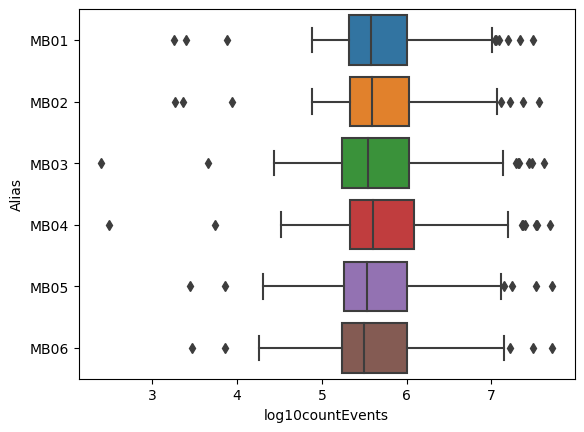

In [11]:
df_c = df.groupby(["Alias", "class"]).sum().reset_index()
df_c["log10countEvents"] = np.log10(df_c["countEvents"])
sns.boxplot(data=df_c, y="Alias", x="log10countEvents")

In [12]:
df_c2 = df.groupby(["Alias", "Barcode", "class"]).sum()
df_c2 = df_c2.groupby(["Alias", "Barcode", "class"]).size().groupby(["Alias", "class"]).sum().reset_index()

In [13]:
df_c2.head()

,Alias,class,0
0,MB01,"1bp insertion - A, 0",88483
1,MB01,"1bp insertion - C, 0",41699
2,MB01,"1bp insertion - G, 0",73760
3,MB01,"1bp insertion - T, 0",57887
4,MB01,">1bp insertion, 0",85477


Text(0.5, 0, 'Count of outcome occurence across KO gRNAs')

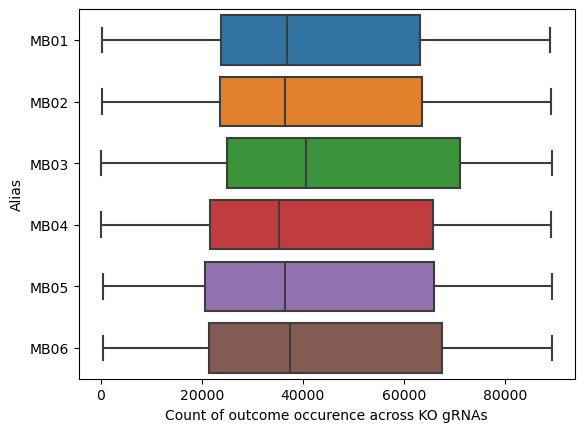

In [14]:
sns.boxplot(data=df_c2, y="Alias", x=0)
plt.xlabel("Count of outcome occurence across KO gRNAs")

In [15]:
p = df.reset_index().pivot(index=["Target", "Alias", "Gene", "Barcode"], columns="class", values="countEvents").fillna(0)

p.head()

class                                       1bp insertion - A, 0  \
Target Alias Gene          Barcode                                 
T1     MB01  0610009B22Rik 0610009B22Rik-1                 126.0   
                           0610009B22Rik-2                 172.0   
                           0610009B22Rik-3                 191.0   
                           0610009B22Rik-4                 280.0   
                           0610009B22Rik-5                 230.0   

class                                       1bp insertion - C, 0  \
Target Alias Gene          Barcode                                 
T1     MB01  0610009B22Rik 0610009B22Rik-1                   4.0   
                           0610009B22Rik-2                   7.0   
                           0610009B22Rik-3                   3.0   
                           0610009B22Rik-4                  20.0   
                           0610009B22Rik-5                  16.0   

class                                       1bp insertion - G, 0  \
Target Alias Gene          Barcode                                 
T1     MB01  0610009B22Rik 0610009B22Rik-1                  30.0   
                           0610009B22Rik-2                   8.0   
                           0610009B22Rik-3                  38.0   
                           0610009B22Rik-4                  28.0   
                           0610009B22Rik-5                   6.0   

class                                       1bp insertion - T, 0  \
Target Alias Gene          Barcode                                 
T1     MB01  0610009B22Rik 0610009B22Rik-1                   5.0   
                           0610009B22Rik-2                   7.0   
                           0610009B22Rik-3                  40.0   
                           0610009B22Rik-4                  40.0   
                           0610009B22Rik-5                   0.0   

class                                       >1bp insertion, 0  \
Target Alias Gene          Barcode                              
T1     MB01  0610009B22Rik 0610009B22Rik-1               55.0   
                           0610009B22Rik-2               90.0   
                           0610009B22Rik-3               64.0   
                           0610009B22Rik-4              126.0   
                           0610009B22Rik-5               36.0   

class                                       Deletion 0bp microhomology, 1  \
Target Alias Gene          Barcode                                          
T1     MB01  0610009B22Rik 0610009B22Rik-1                            2.0   
                           0610009B22Rik-2                            4.0   
                           0610009B22Rik-3                            0.0   
                           0610009B22Rik-4                            0.0   
                           0610009B22Rik-5                            0.0   

class                                       Deletion 0bp microhomology, 10  \
Target Alias Gene          Barcode                                           
T1     MB01  0610009B22Rik 0610009B22Rik-1                            23.0   
                           0610009B22Rik-2                            14.0   
                           0610009B22Rik-3                             0.0   
                           0610009B22Rik-4                             0.0   
                           0610009B22Rik-5                             2.0   

class                                       Deletion 0bp microhomology, 11  \
Target Alias Gene          Barcode                                           
T1     MB01  0610009B22Rik 0610009B22Rik-1                            13.0   
                           0610009B22Rik-2                             9.0   
                           0610009B22Rik-3                            21.0   
                           0610009B22Rik-4                            25.0   
                           0610009B22Rik-5                             9.0   

cl

In [16]:
df[["countEvents"]].groupby(["Target", "Alias", "Barcode"]).sum().sort_values(by="countEvents")

countEvents
Target Alias Barcode                 
T1     MB01  Thoc3-1                2
T3     MB06  Aknad1-1               2
             Clca4c-ps-3            2
T2     MB04  Cmss1-4                2
             Riok1-3                2
...                               ...
T3     MB05  Trp53-4           124698
T2     MB04  Trp53-1           128510
             Trp53-3           129253
       MB03  Trp53-4           140967
       MB04  Trp53-4           167757

[536765 rows x 1 columns]

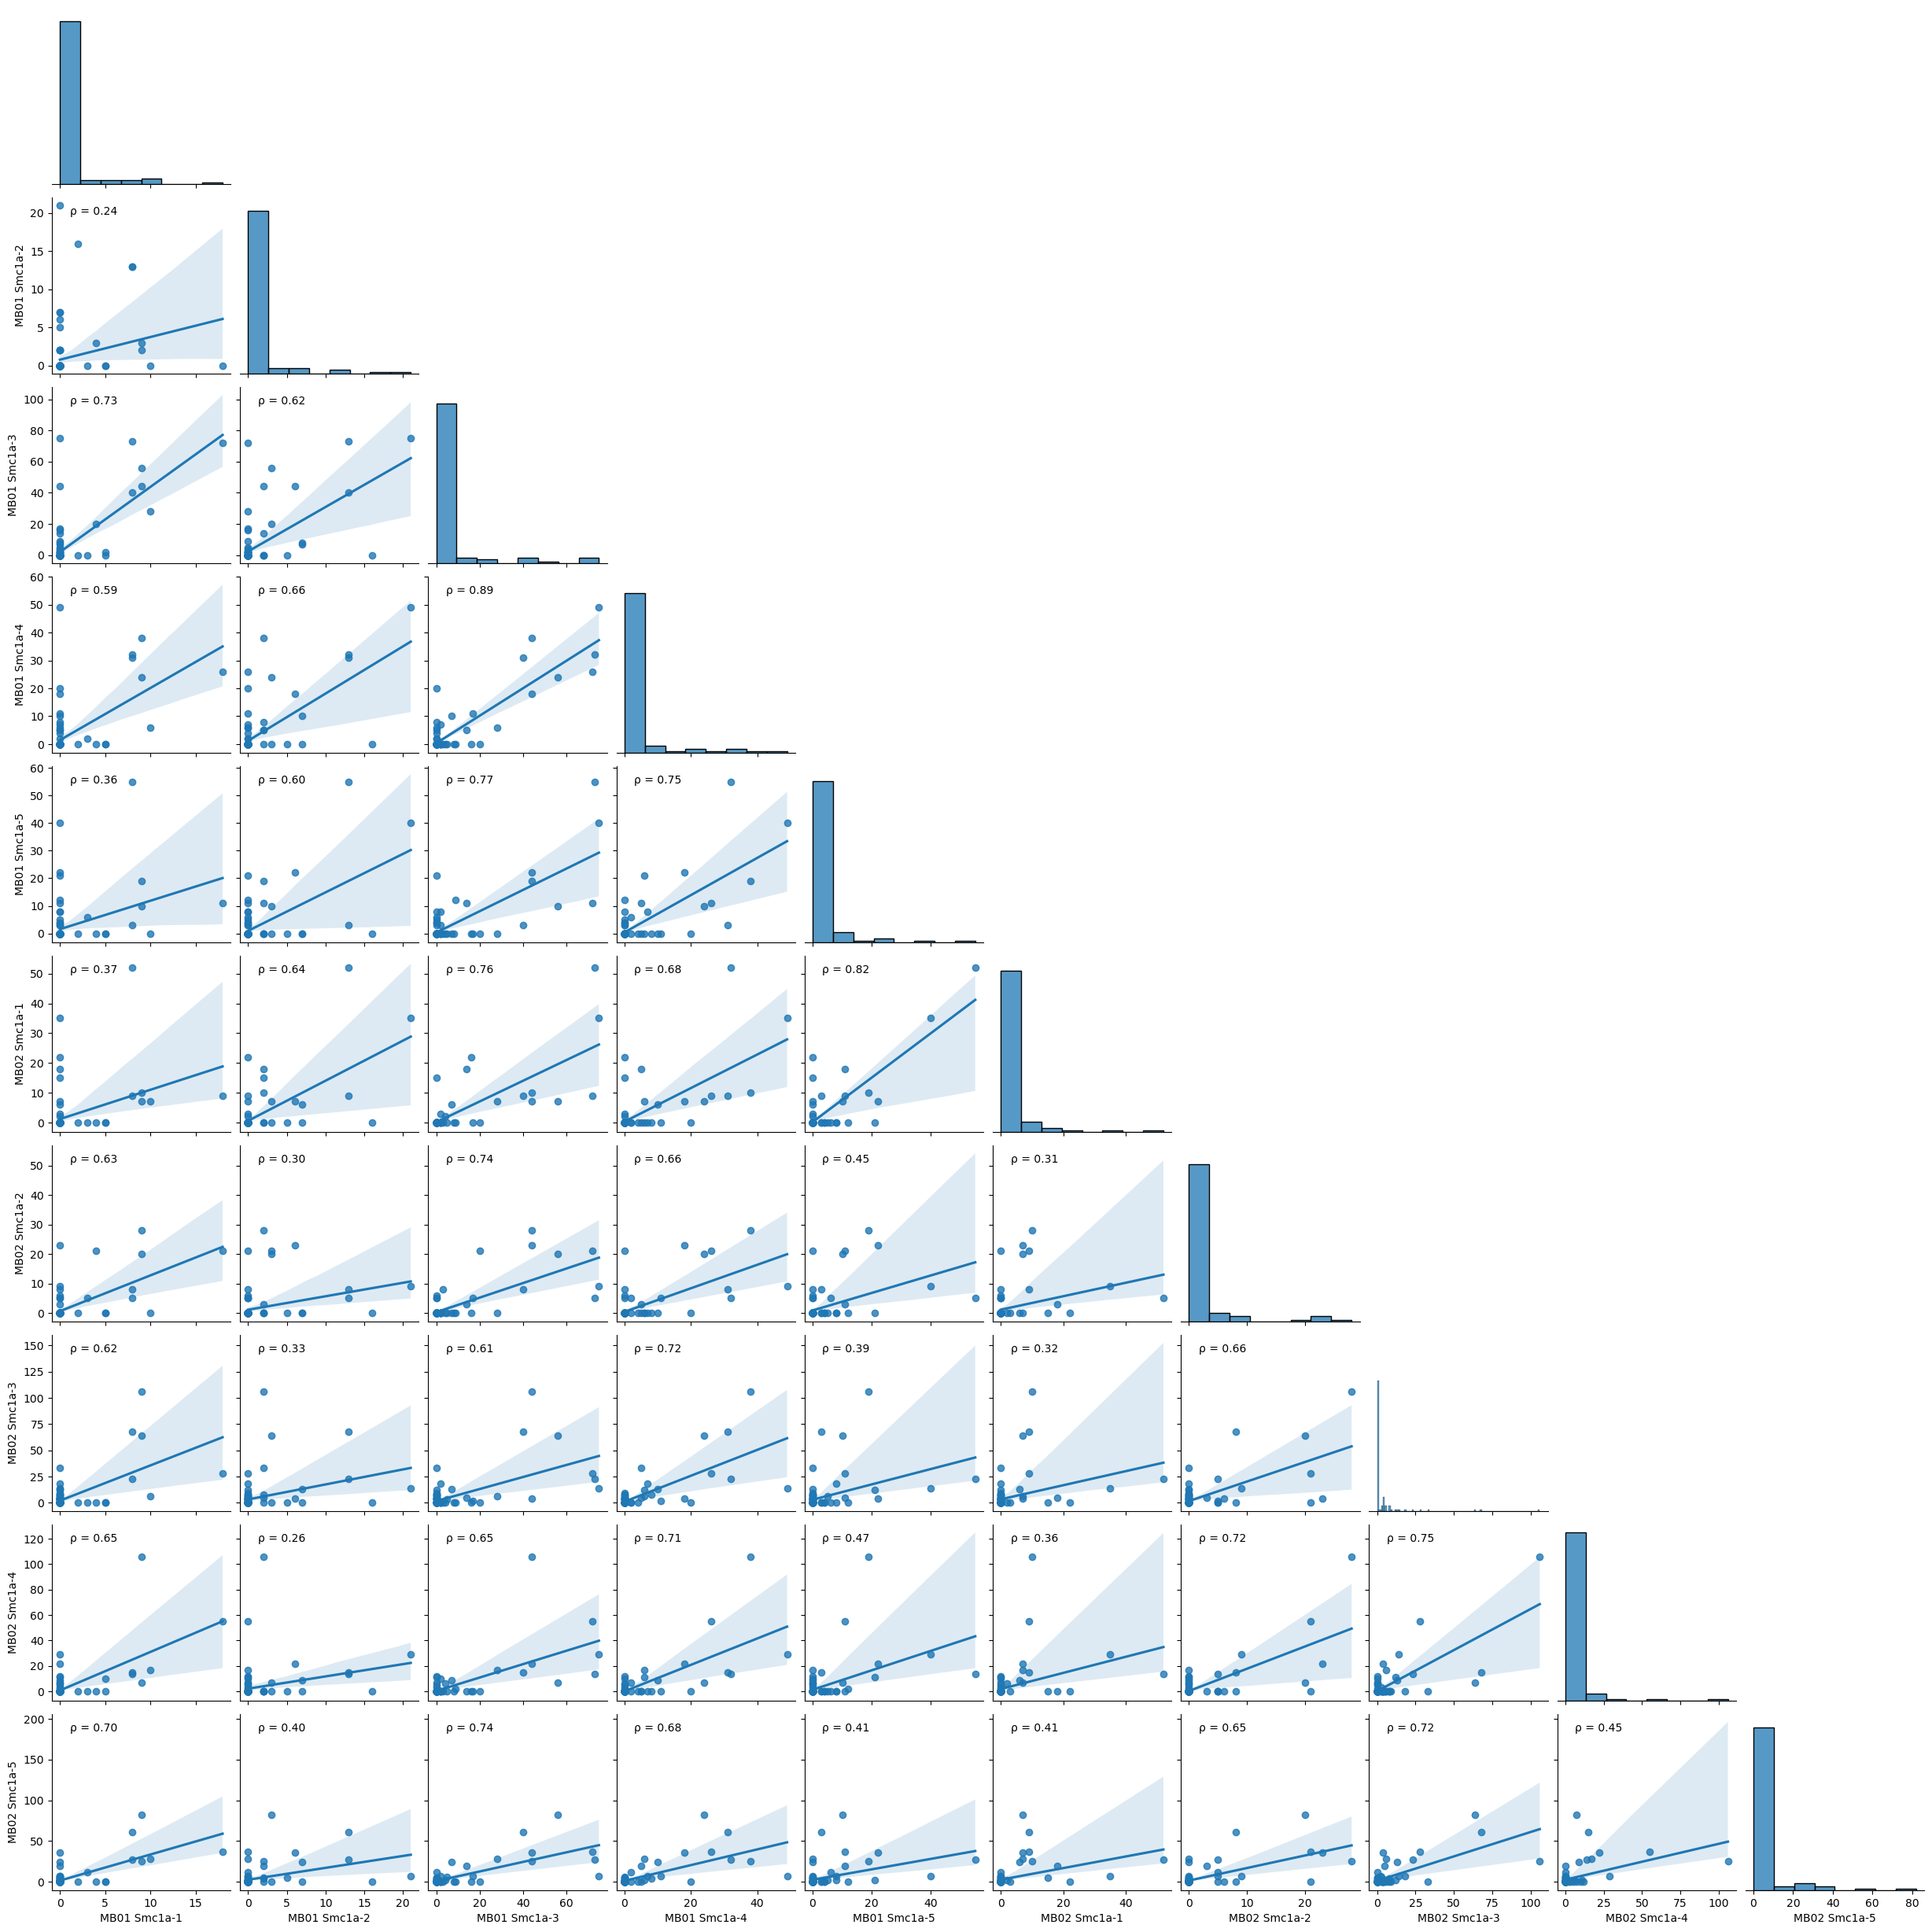

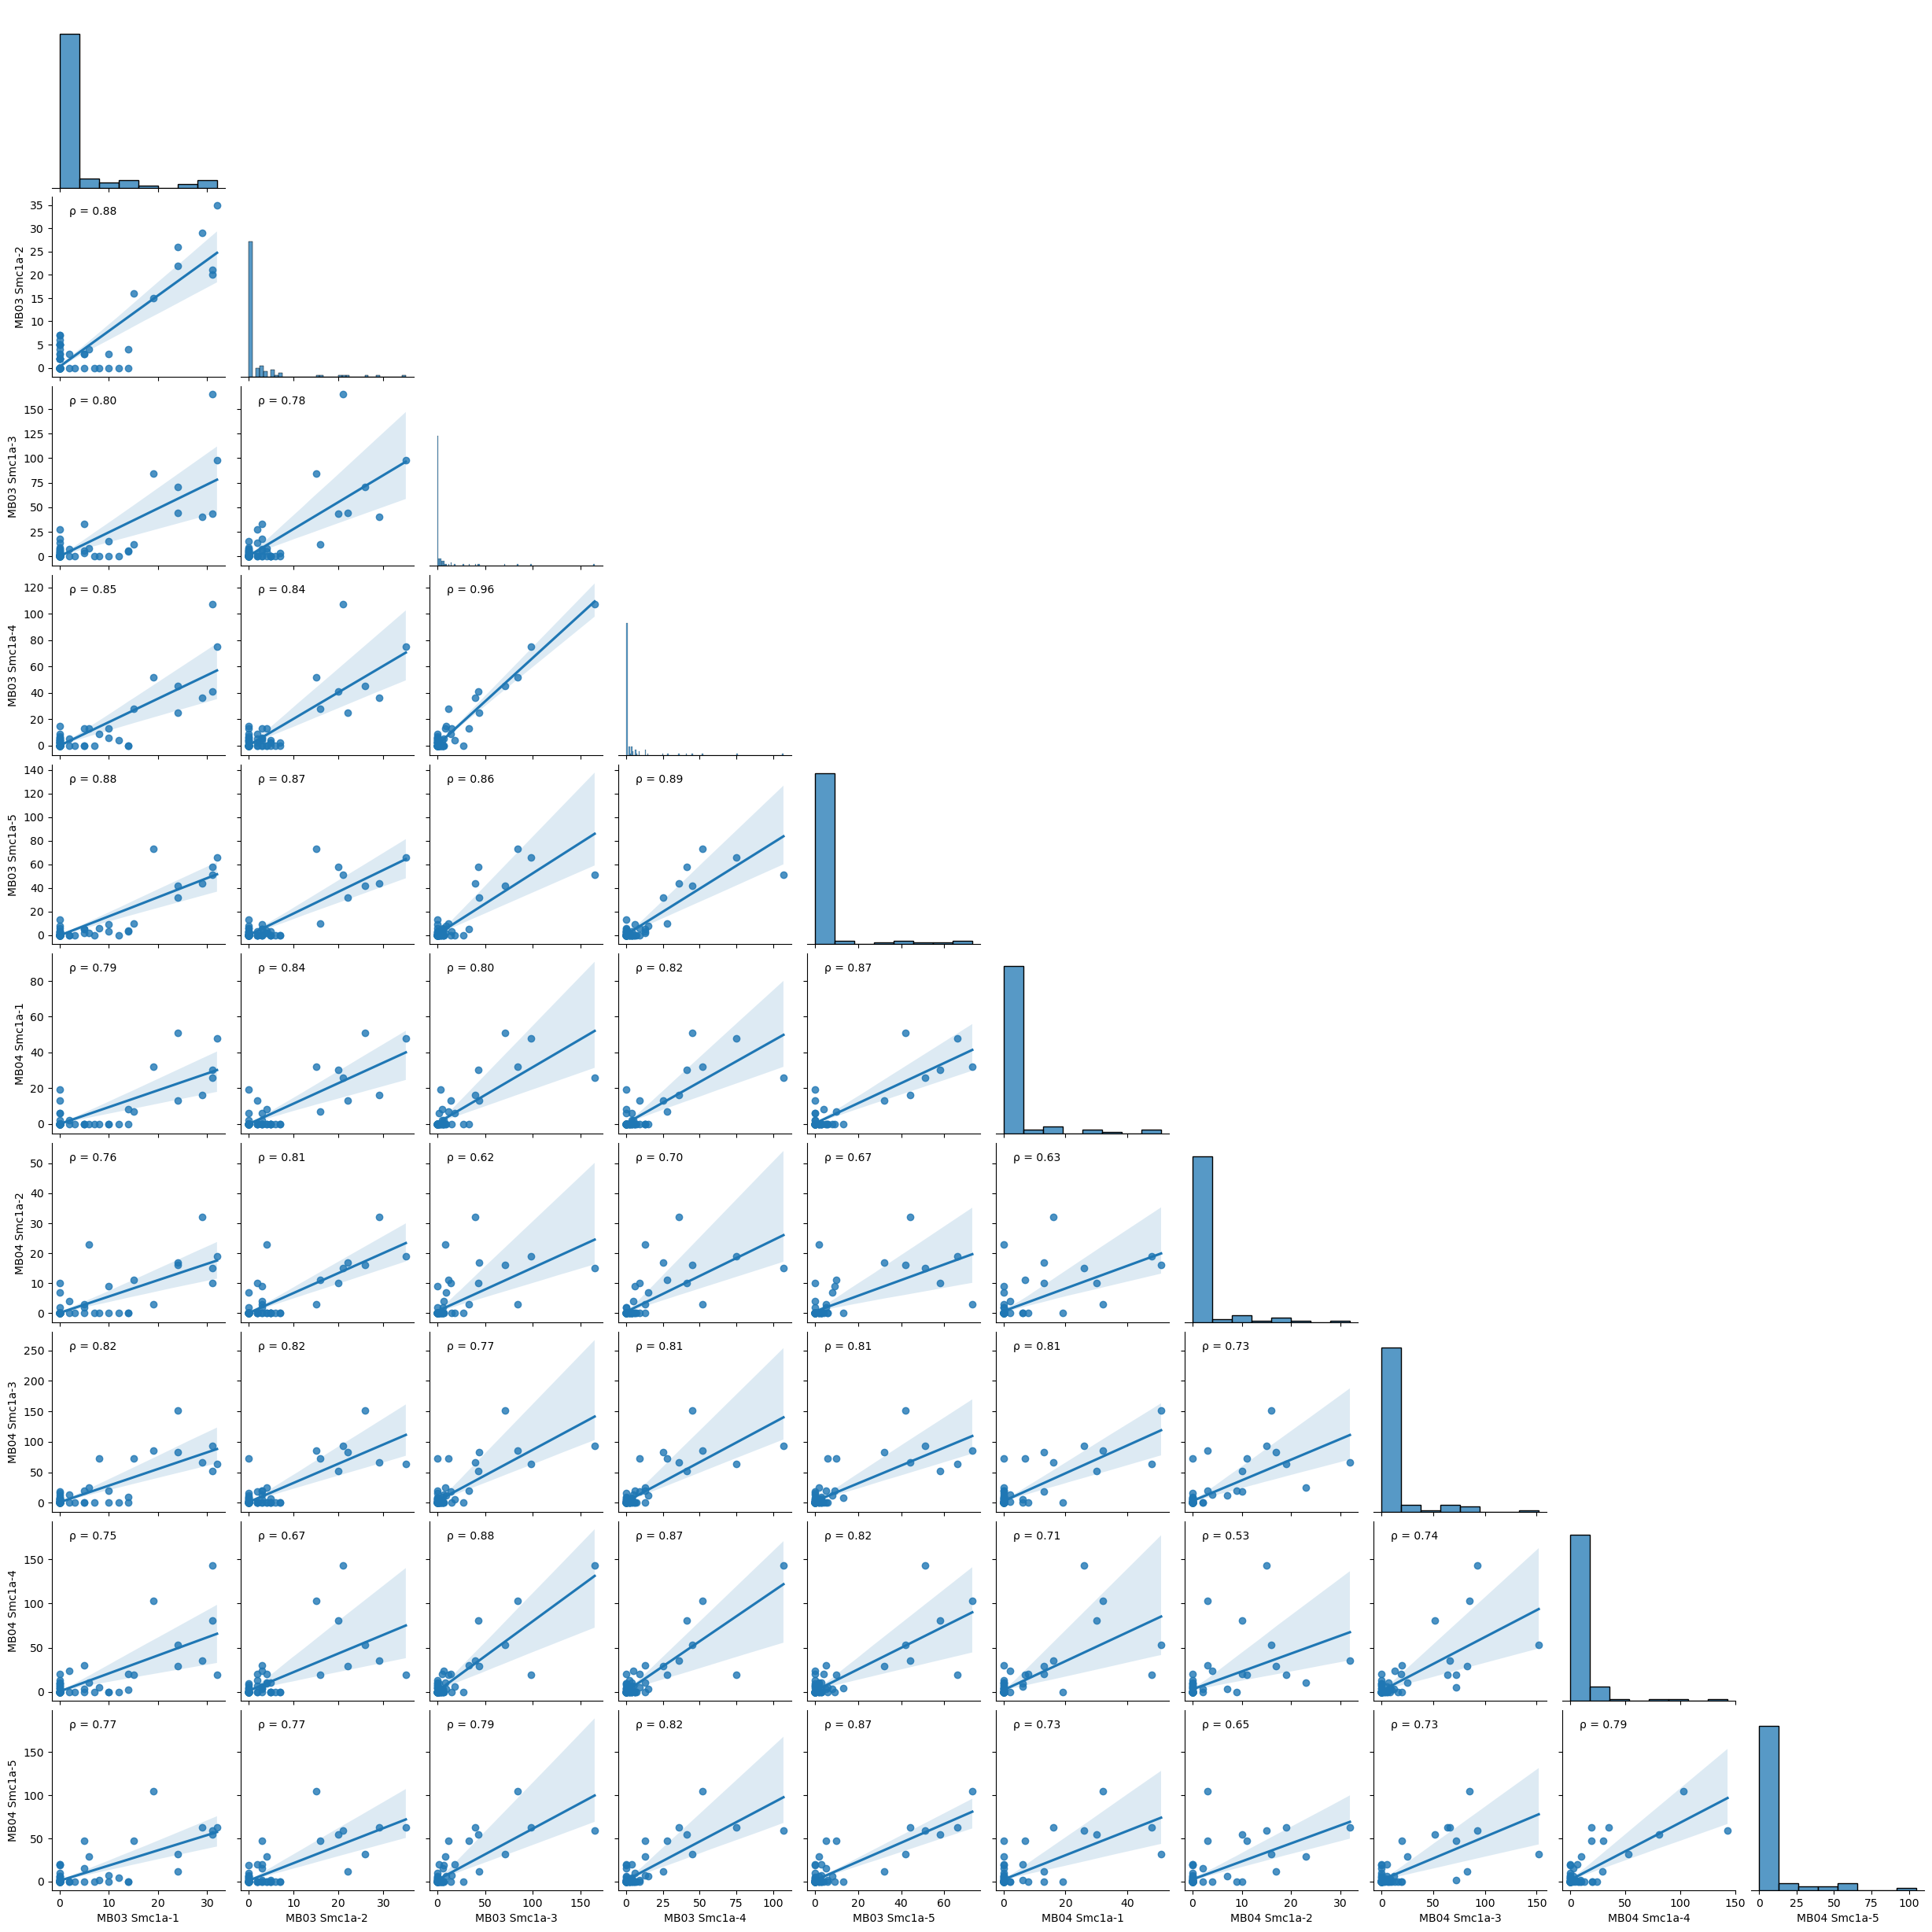

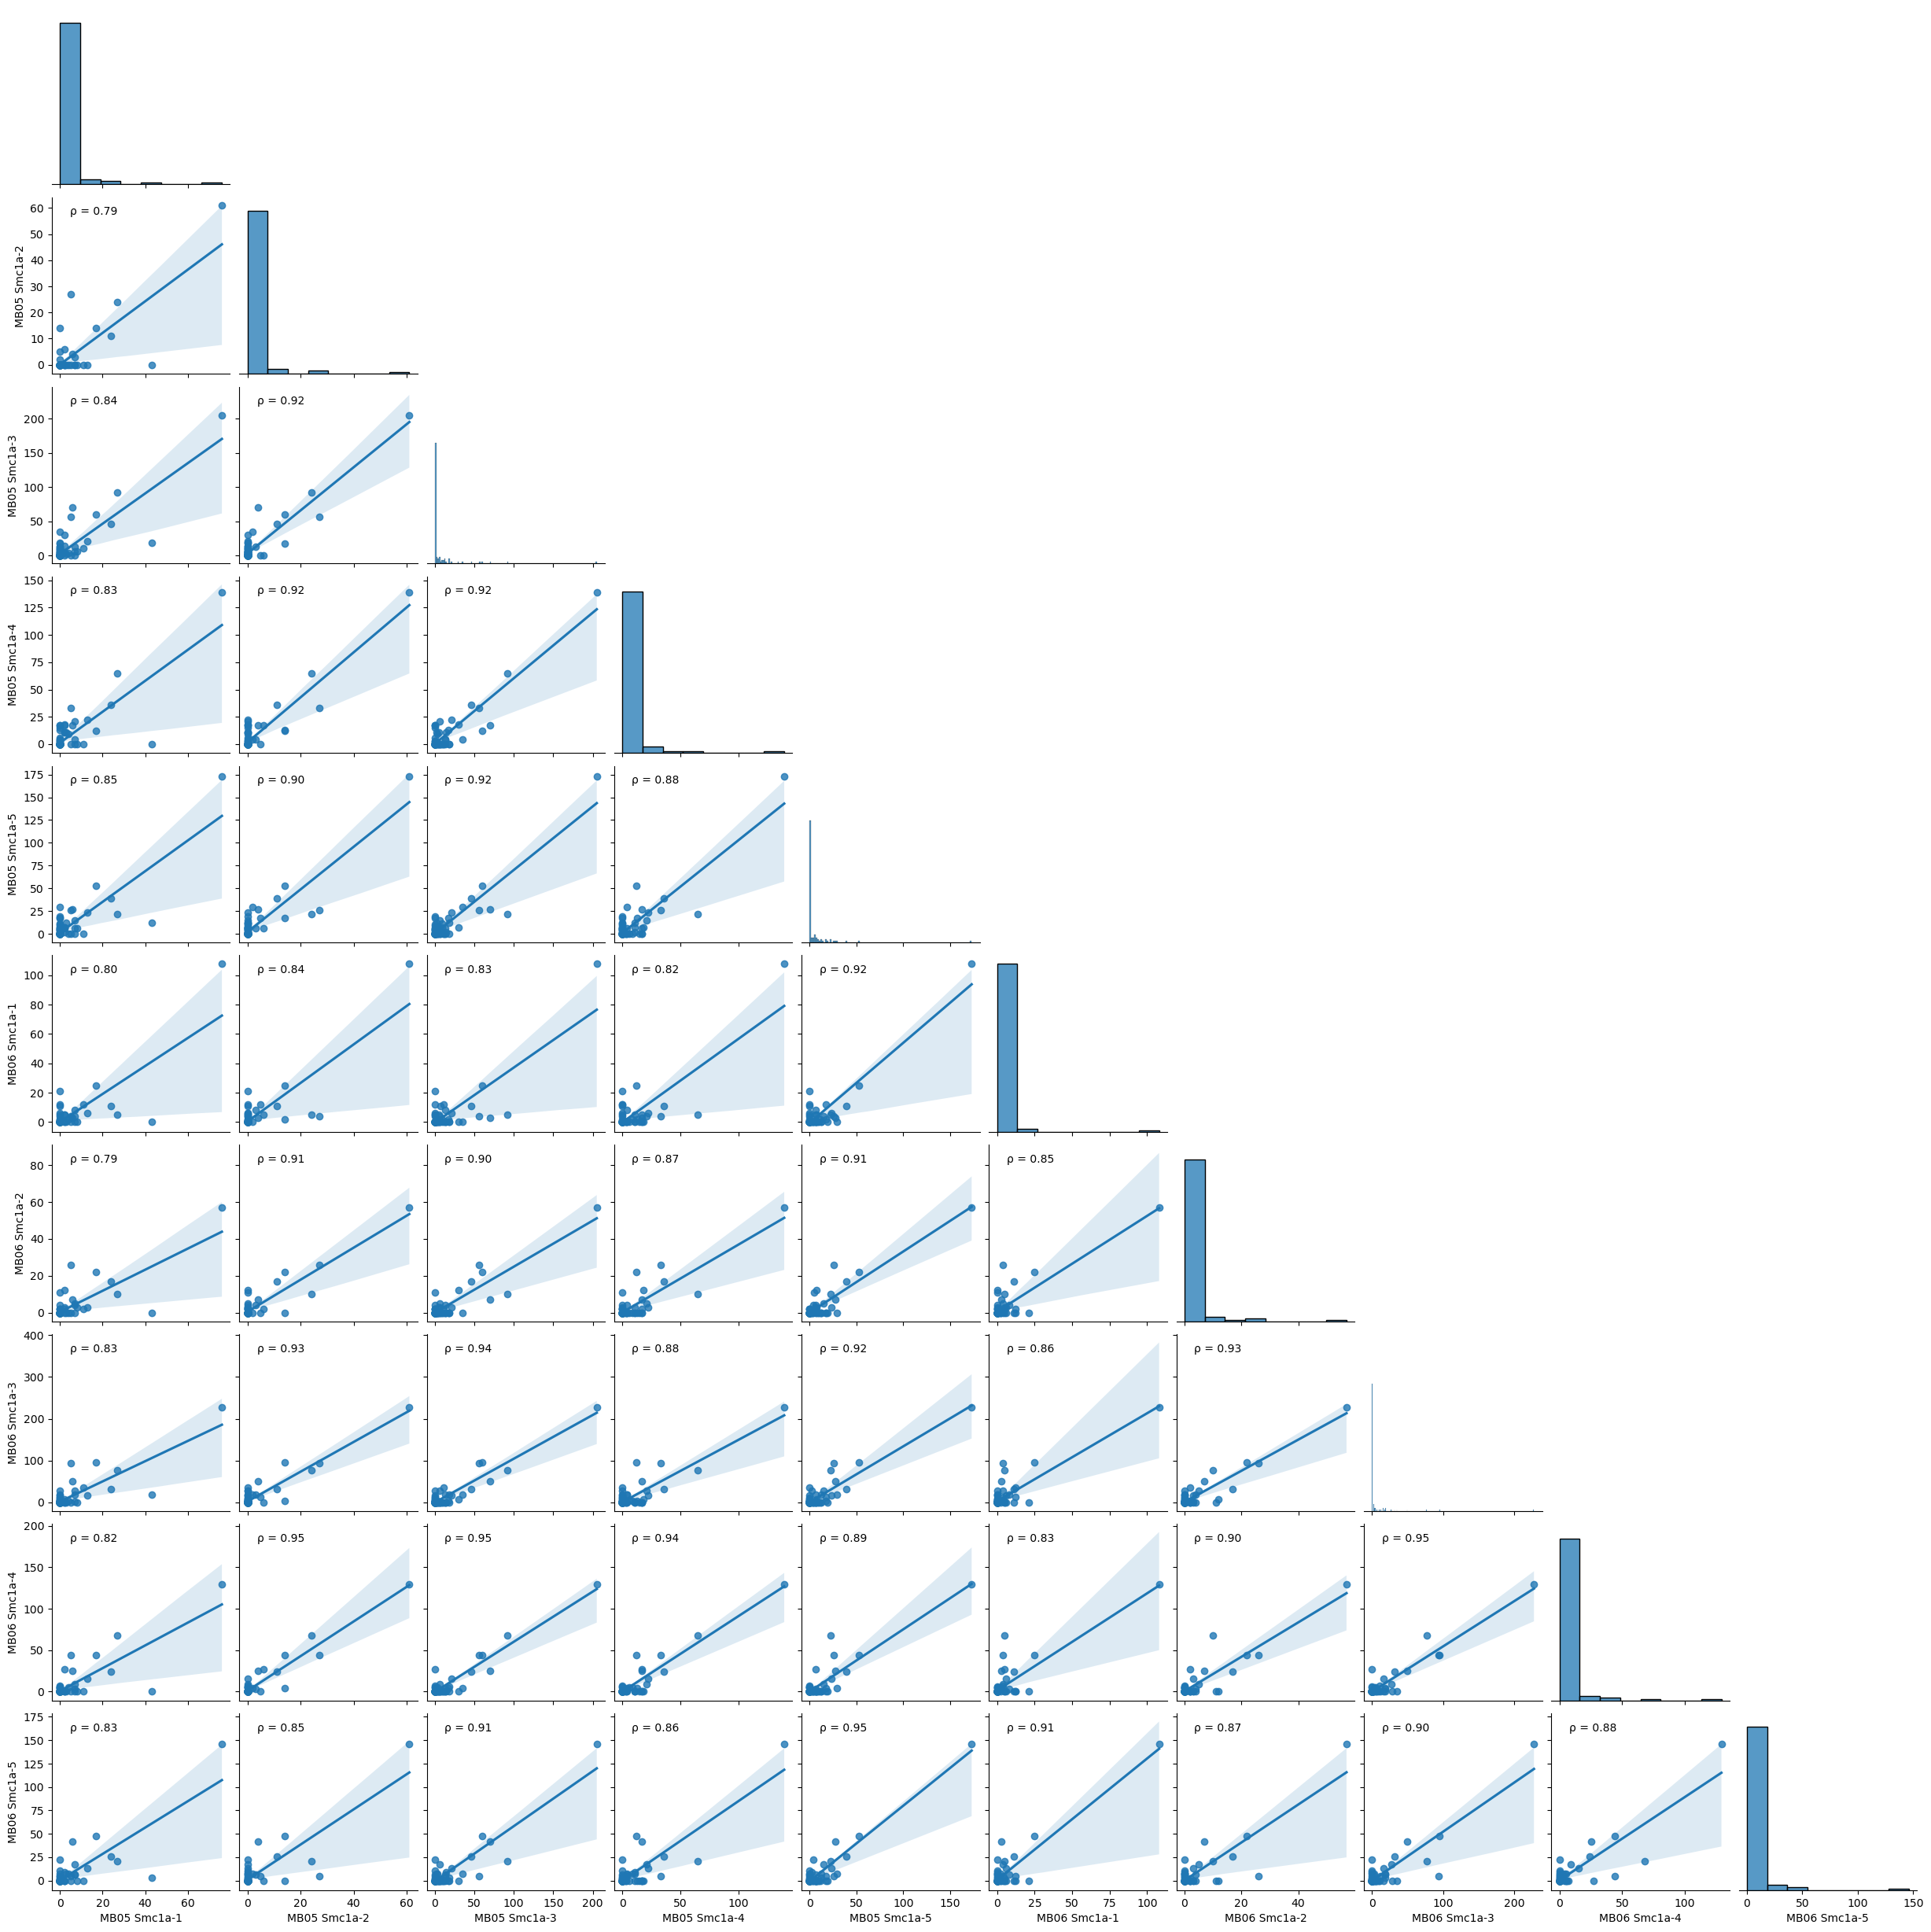

In [17]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)


gene_to_investigate = "Smc1a"
for target_site in ["T1", "T2", "T3"]:
    idx = pd.IndexSlice
    pairplot_df = p.loc[idx[target_site, :, gene_to_investigate, :]].T
    pairplot_df.columns = [' '.join(col).strip() for col in pairplot_df.columns.values]
    g = sns.pairplot(data=pairplot_df, diag_kind='hist', corner=True, kind="reg")
    g.map_lower(corrfunc)
    plt.savefig("figures/{}_{}.png".format(gene_to_investigate, target_site))


In [18]:
samples = ["MB01", "MB03", "MB05", "MB02", "MB04", "MB06"]

CORR_THRESHOLD = {}
MUTATED_READ_COUNT_THRESHOLD = {}
for s in samples:
    # MUTATED_READ_COUNT_THRESHOLD[s] = np.percentile(gene_results.loc[s]["Count"].fillna(0).to_numpy(), 2.5)
    # CORR_THRESHOLD[s] = np.percentile(gene_results.loc[s]["Corr"].fillna(0).to_numpy(), 2.5)
    MUTATED_READ_COUNT_THRESHOLD[s] = 200
    CORR_THRESHOLD[s] = .6
NUM_GRNAS_THRESHOLD = 3

In [43]:
from src.data.filter import filter_barcodes

gene_results, profiles = filter_barcodes(p)

Start filtering...
Before: 536765 gRNAs, 18406 genes
After 1000 read count cutoff: 432216 gRNAs, 18115 genes
After 2 plus gRNA cutoff: 431806 gRNAs, 18028 genes


100%|██████████| 17884/17884 [02:50<00:00, 104.71it/s]


After 0.6 median correlation cutoff: 431805 gRNAs, 18028 genes
After filtering barcodes which were bad in 2 targets: 426862 gRNAs, 17890 genes


In [60]:
gene_results.groupby("Filtered").size()

Filtered
0    426862
1    101538
2      3421
3         1
5      4943
dtype: int64

In [61]:
gene_results[gene_results["Filtered"] == 4].sort_values(by="Corr_Between")

,,,,Filtered,Counts,Corr_Within,Corr_Between,log10Count
Target,Alias,Gene,Barcode,,,,,


In [62]:
idx = pd.IndexSlice
gene_results.loc[idx[:,:,"Smc1a",:]]

Filtered  Counts  Corr_Within  Corr_Between  log10Count
Target Alias Barcode                                                         
T1     MB01  Smc1a-1         1    81.0          NaN           NaN    1.908485
             Smc1a-2         1   104.0          NaN           NaN    2.017033
             Smc1a-3         1   545.0          NaN           NaN    2.736397
             Smc1a-4         1   304.0          NaN           NaN    2.482874
             Smc1a-5         1   245.0          NaN           NaN    2.389166
       MB02  Smc1a-1         1   202.0          NaN           NaN    2.305351
             Smc1a-2         1   167.0          NaN           NaN    2.222716
             Smc1a-3         1   475.0          NaN           NaN    2.676694
             Smc1a-4         1   330.0          NaN           NaN    2.518514
             Smc1a-5         1   406.0          NaN           NaN    2.608526
T2     MB03  Smc1a-1         1   308.0          NaN           NaN    2.488551
             Smc1a-2         1   264.0          NaN           NaN    2.421604
             Smc1a-3         1   755.0          NaN           NaN    2.877947
             Smc1a-4         1   549.0          NaN           NaN    2.739572
             Smc1a-5         1   457.0          NaN           NaN    2.659916
       MB04  Smc1a-1         1   279.0          NaN           NaN    2.445604
             Smc1a-2         1   183.0          NaN           NaN    2.262451
             Smc1a-3         1   922.0          NaN           NaN    2.964731
             Smc1a-4         1   669.0          NaN           NaN    2.825426
             Smc1a-5         1   638.0          NaN           NaN    2.804821
T3     MB05  Smc1a-1         1   271.0          NaN           NaN    2.432969
             Smc1a-2         1   171.0          NaN           NaN    2.232996
             Smc1a-3         1   816.0          NaN           NaN    2.911690
             Smc1a-4         1   510.0          NaN           NaN    2.707570
             Smc1a-5         1   585.0          NaN           NaN    2.767156
       MB06  Smc1a-1         1   261.0          NaN           NaN    2.416641
             Smc1a-2         1   194.0          NaN           NaN    2.287802
             Smc1a-3         1   829.0          NaN           NaN    2.918555
             Smc1a-4         1   424.0          NaN           NaN    2.627366
             Smc1a-5         1   410.0          NaN           NaN    2.612784

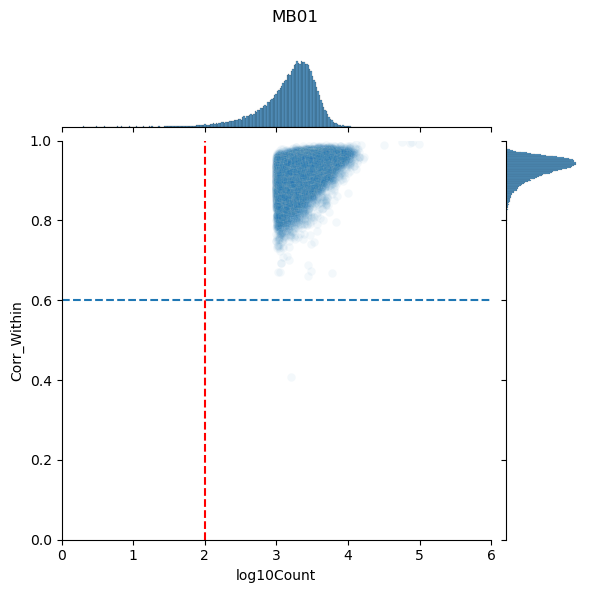

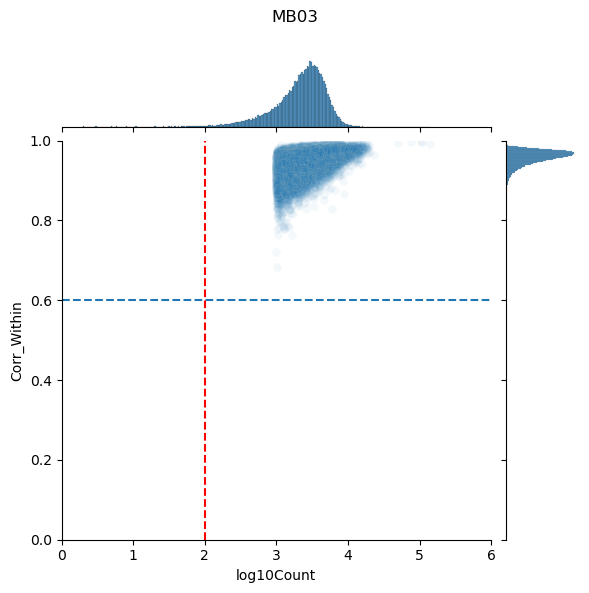

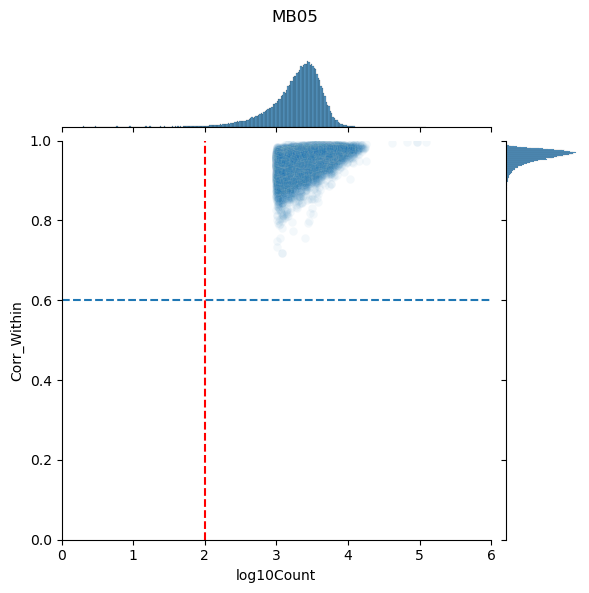

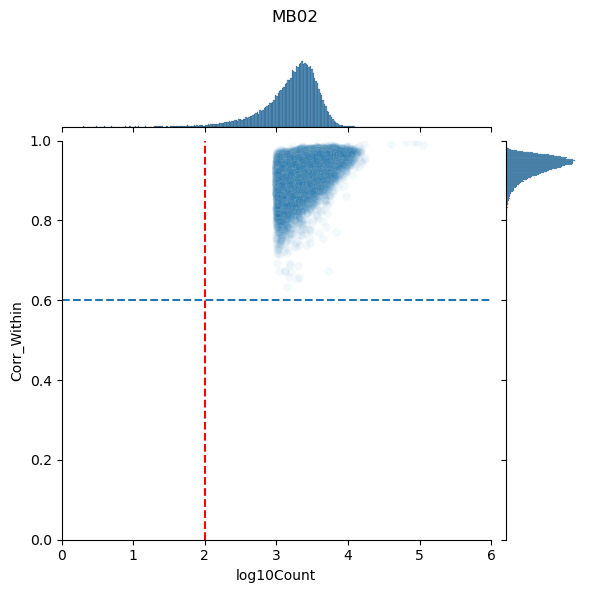

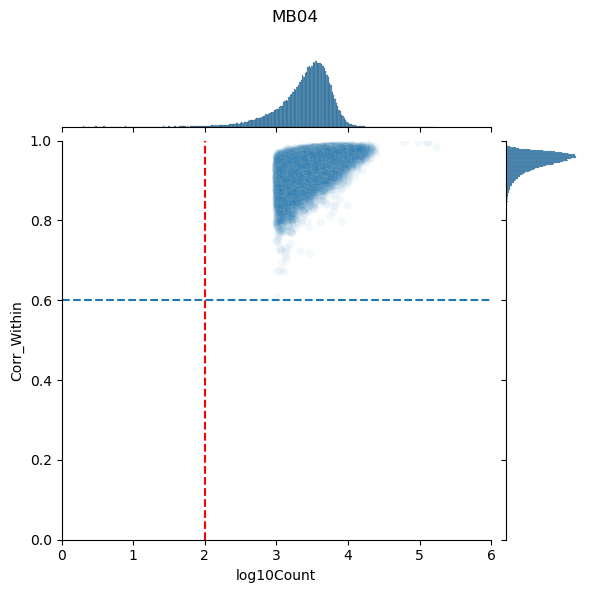

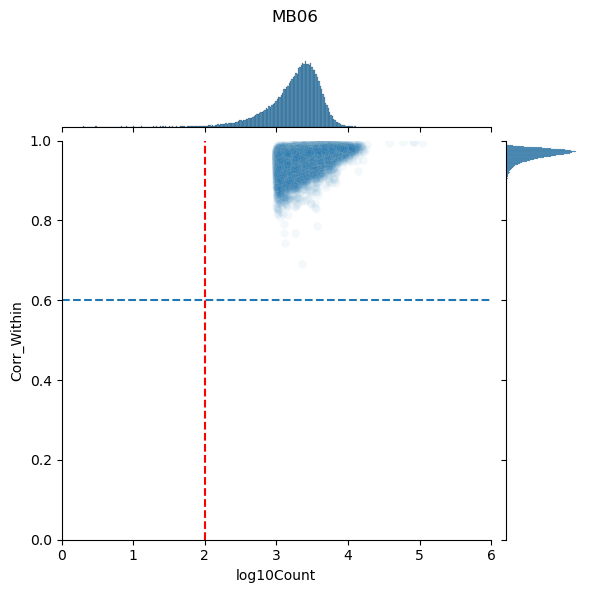

In [63]:
gene_results["log10Count"] = np.log10(gene_results["Counts"])

for s in samples:
    g = sns.jointplot(data=gene_results.droplevel("Target").loc[s].reset_index(), x="log10Count", y="Corr_Within", alpha=.05, palette="Paired", ylim=(0,1), xlim=(0,6))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle(s)
    g.ax_joint.axhline(.6, ls='--')
    g.ax_joint.axvline(np.log10(100), ls='--', c="r")

In [64]:
"1110004F10Rik-5" in profiles.index.get_level_values("Barcode")

False

In [65]:
idx = pd.IndexSlice
barcode_counts_per_gene = gene_results.groupby(["Gene", "Barcode"]).size().groupby("Gene").size()
gene_results.loc[idx[:,:,barcode_counts_per_gene[barcode_counts_per_gene == 2].index.to_list(),:]].sort_values(by="Counts").head(20)

Filtered  Counts  Corr_Within  Corr_Between  \
Target Alias Gene    Barcode                                                  
T1     MB01  Rpl35a  Rpl35a-2          1     2.0          NaN           NaN   
             Rpl12   Rpl12-2           1     3.0          NaN           NaN   
             Rpl10a  Rpl10a-3          1     7.0          NaN           NaN   
T2     MB03  Nrep    Nrep-2            2    10.0          NaN           NaN   
T1     MB02  Npm1    Npm1-5            1    11.0          NaN           NaN   
T3     MB05  Rpl12   Rpl12-2           1    15.0          NaN           NaN   
T1     MB02  Dbpht2  Dbpht2-1          1    15.0          NaN           NaN   
       MB01  Chchd2  Chchd2-5          1    16.0          NaN           NaN   
             Srsf3   Srsf3-3           2    17.0          NaN           NaN   
             Npm1    Npm1-5            1    18.0          NaN           NaN   
       MB02  Chchd2  Chchd2-5          1    19.0          NaN           NaN   
T2     MB03  Dbpht2  Dbpht2-1          1    20.0          NaN           NaN   
T1     MB02  Rpl12   Rpl12-2           1    22.0          NaN           NaN   
T3     MB06  Gm14326 Gm14326-1         1    24.0          NaN           NaN   
T1     MB01  Dbpht2  Dbpht2-1          1    25.0          NaN           NaN   
       MB02  Rpl17   Rpl17-1           1    27.0          NaN           NaN   
             Srsf3   Srsf3-3           2    29.0          NaN           NaN   
       MB01  Rpl17   Rpl17-1           1    30.0          NaN           NaN   
T2     MB03  Rpl10a  Rpl10a-3          1    32.0          NaN           NaN   
T3     MB06  Rpl35a  Rpl35a-2          1    32.0          NaN           NaN   

                                log10Count  
Target Alias Gene    Barcode                
T1     MB01  Rpl35a  Rpl35a-2     0.301030  
             Rpl12   Rpl12-2      0.477121  
             Rpl10a  Rpl10a-3     0.845098  
T2     MB03  Nrep    Nrep-2       1.000000  
T1     MB02  Npm1    Npm1-5       1.041393  
T3     MB05  Rpl12   Rpl12-2      1.176091  
T1     MB02  Dbpht2  Dbpht2-1     1.176091  
       MB01  Chchd2  Chchd2-5     1.204120  
             Srsf3   Srsf3-3      1.230449  
             Npm1    Npm1-5       1.255273  
       MB02  Chchd2  Chchd2-5     1.278754  
T2     MB03  Dbpht2  Dbpht2-1     1.301030  
T1     MB02  Rpl12   Rpl12-2      1.342423  
T3     MB06  Gm14326 Gm14326-1    1.380211  
T1     MB01  Dbpht2  Dbpht2-1     1.397940  
       MB02  Rpl17   Rpl17-1      1.431364  
             Srsf3   Srsf3-3      1.462398  
       MB01  Rpl17   Rpl17-1      1.477121  
T2     MB03  Rpl10a  Rpl10a-3     1.505150  
T3     MB06  Rpl35a  Rpl35a-2     1.505150

In [66]:
gene_results.xs("Gsta4", level="Gene")

Filtered  Counts  Corr_Within  Corr_Between  log10Count
Target Alias Barcode                                                         
T1     MB01  Gsta4-1         1   132.0          NaN           NaN    2.120574
             Gsta4-2         0  1403.0     0.850671      0.895264    3.147058
             Gsta4-3         1   681.0          NaN           NaN    2.833147
             Gsta4-4         1   841.0          NaN           NaN    2.924796
             Gsta4-5         0  2571.0     0.850671      0.933246    3.410102
       MB02  Gsta4-1         1   119.0          NaN           NaN    2.075547
             Gsta4-2         0  1004.0     0.928772      0.916044    3.001734
             Gsta4-3         1   766.0          NaN           NaN    2.884229
             Gsta4-4         1   710.0          NaN           NaN    2.851258
             Gsta4-5         0  2252.0     0.928772      0.912466    3.352568
T2     MB03  Gsta4-1         1   162.0          NaN           NaN    2.209515
             Gsta4-2         0  1500.0     0.860707      0.867238    3.176091
             Gsta4-3         0  1046.0     0.908178      0.886737    3.019532
             Gsta4-4         0  1134.0     0.873958      0.912845    3.054613
             Gsta4-5         0  2564.0     0.908178      0.947063    3.408918
       MB04  Gsta4-1         1   347.0          NaN           NaN    2.540329
             Gsta4-2         0  2144.0     0.875468      0.916663    3.331225
             Gsta4-3         0  1157.0     0.874819      0.871505    3.063333
             Gsta4-4         0  1189.0     0.875468      0.904427    3.075182
             Gsta4-5         0  3465.0     0.916403      0.915942    3.539703
T3     MB05  Gsta4-1         1   212.0          NaN           NaN    2.326336
             Gsta4-2         0  1450.0     0.906234      0.961836    3.161368
             Gsta4-3         0  1003.0     0.902691      0.910454    3.001301
             Gsta4-4         1   700.0          NaN           NaN    2.845098
             Gsta4-5         0  2808.0     0.938940      0.934106    3.448397
       MB06  Gsta4-1         1   198.0          NaN           NaN    2.296665
             Gsta4-2         0  1219.0     0.974753      0.962586    3.086004
             Gsta4-3         1   666.0          NaN           NaN    2.823474
             Gsta4-4         0  1188.0     0.971561      0.934106    3.074816
             Gsta4-5         0  2916.0     0.971303      0.932599    3.464788

In [67]:
gene_results[(gene_results["Filtered"] == 1)]

Filtered  Counts  Corr_Within  \
Target Alias Gene          Barcode                                          
T1     MB01  0610010K14Rik 0610010K14Rik-3         1   774.0          NaN   
             0610030E20Rik 0610030E20Rik-2         1   962.0          NaN   
                           0610030E20Rik-5         1   975.0          NaN   
             0610040J01Rik 0610040J01Rik-4         1     7.0          NaN   
                           0610040J01Rik-5         1   956.0          NaN   
...                                              ...     ...          ...   
T3     MB06  Zwilch        Zwilch-5                1   732.0          NaN   
             a             a-2                     1   553.0          NaN   
                           a-3                     1   494.0          NaN   
             mei-04        Mei4-4                  1   251.0          NaN   
                           Mei4-5                  1   981.0          NaN   

                                            Corr_Between  log10Count  
Target Alias Gene          Barcode                                    
T1     MB01  0610010K14Rik 0610010K14Rik-3           NaN    2.888741  
             0610030E20Rik 0610030E20Rik-2           NaN    2.983175  
                           0610030E20Rik-5           NaN    2.989005  
             0610040J01Rik 0610040J01Rik-4           NaN    0.845098  
                           0610040J01Rik-5           NaN    2.980458  
...                                                  ...         ...  
T3     MB06  Zwilch        Zwilch-5                  NaN    2.864511  
             a             a-2                       NaN    2.742725  
                           a-3                       NaN    2.693727  
             mei-04        Mei4-4                    NaN    2.399674  
                           Mei4-5                    NaN    2.991669  

[101538 rows x 5 columns]

In [68]:
filtered_by_corr = {}
for s in ["MB0{}".format(i) for i in range(1,7)]:
    filtered_by_corr[s] = set(gene_results[(gene_results["Filtered"] == 1)].droplevel("Target").loc[s].index.unique(level="Barcode"))

<AxesSubplot:>

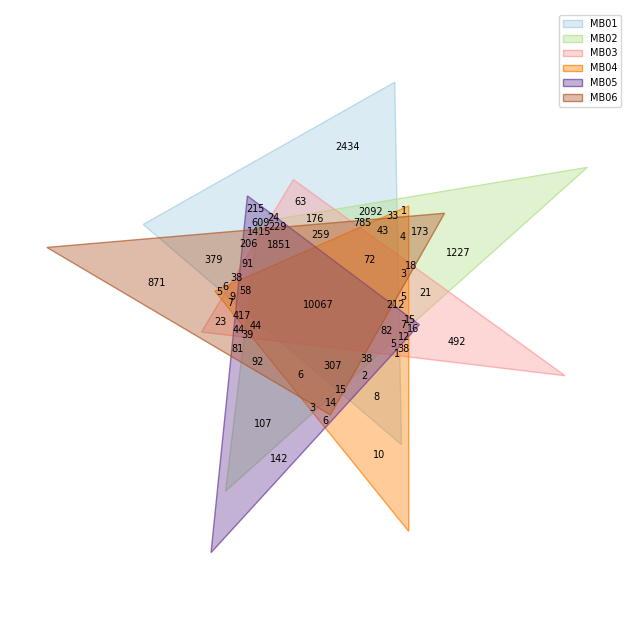

In [69]:
from src.visualization.pyvenn.venn import venn

venn(filtered_by_corr, cmap="Paired", fontsize=7)

In [70]:
from src.config import get_common_barcodes

gene_results.reset_index().to_csv(get_common_barcodes(), sep="\t", index=False)

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


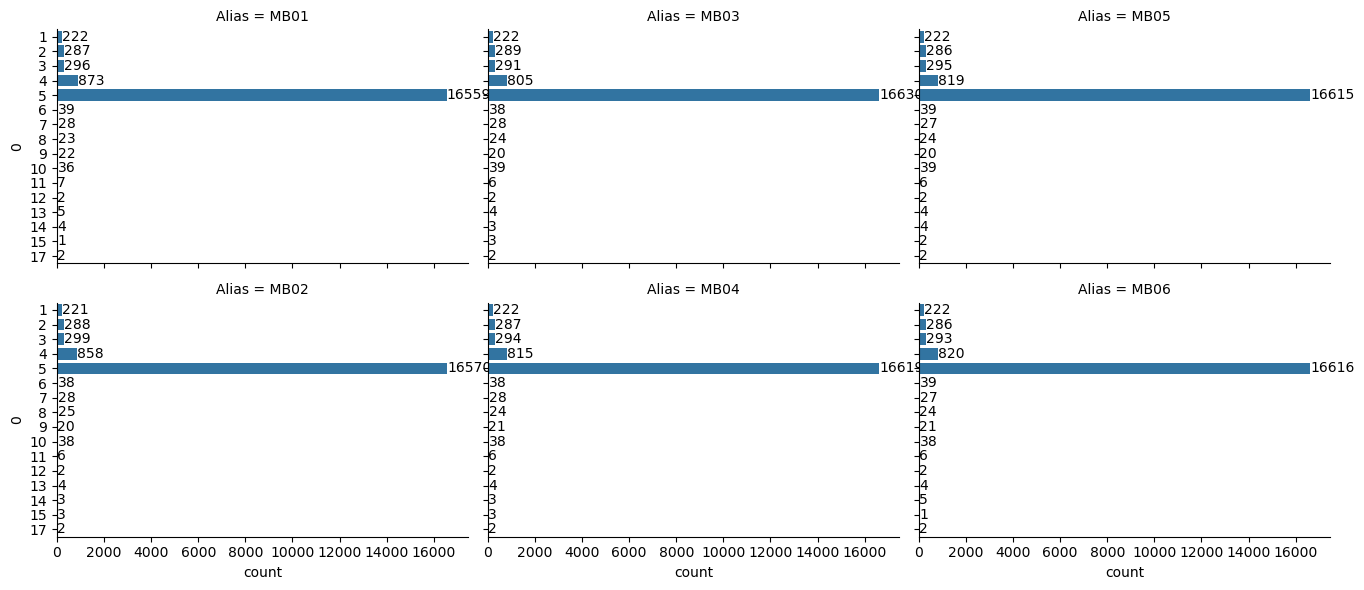

In [71]:
barcodes_per_gene_1 = df.groupby(["Alias", "Gene", "Barcode"]).size().groupby(["Alias", "Gene"]).size().reset_index()
barcodes_per_gene_1["State"] = "Before"
g = sns.FacetGrid(data=barcodes_per_gene_1, col="Alias", col_wrap = 3, col_order=["MB01", "MB03", "MB05", "MB02", "MB04", "MB06"], size=3, aspect=1.5)
g.map_dataframe(sns.countplot, y=0)
for ax in g.axes:
    ax.bar_label(ax.containers[0])

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


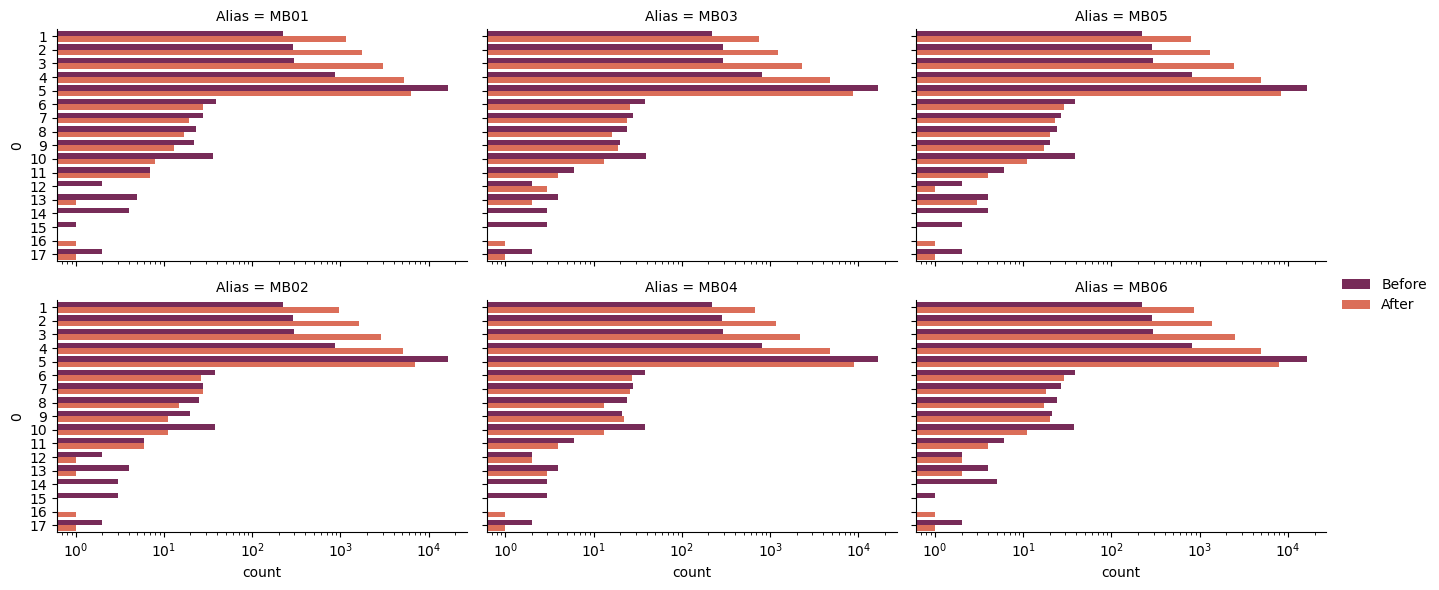

In [72]:
barcodes_per_gene_2 = gene_results[gene_results["Filtered"] == 0].groupby(["Alias", "Gene", "Barcode"]).size().groupby(["Alias", "Gene"]).size().reset_index()
barcodes_per_gene_2["State"] = "After"
countplt_df = pd.concat([barcodes_per_gene_1, barcodes_per_gene_2])

g = sns.FacetGrid(data=countplt_df, col="Alias", col_wrap = 3, col_order=["MB01", "MB03", "MB05", "MB02", "MB04", "MB06"], size=3, aspect=1.5)
g.map_dataframe(sns.countplot, y=0, hue="State", palette="rocket", log=True)
g.add_legend()
# g.set_yscale("log")
# for ax in g.axes:
#     ax.bar_label(ax.containers[0])

In [73]:
profiles.groupby(["Alias", "Gene"]).size()[(profiles.groupby(["Alias", "Gene"]).size() == 1)]

Alias  Gene         
MB01   1110065P20Rik    1
       1700013D24Rik    1
       1700025G04Rik    1
       1700034E13Rik    1
       1700129C05Rik    1
                       ..
MB06   Zfp995           1
       Zmym5            1
       Zpld1            1
       Zpr1             1
       Zscan4d          1
Length: 5185, dtype: int64

In [74]:
df.loc[("T1", "MB02", "Cenpa")].groupby("Barcode").sum()

,fraction_per_barcode,del_len,countEvents
Barcode,,,
Cenpa-1,1.0,109,129
Cenpa-2,1.0,190,141
Cenpa-3,1.0,123,409
Cenpa-4,1.0,142,214
Cenpa-5,1.0,130,271


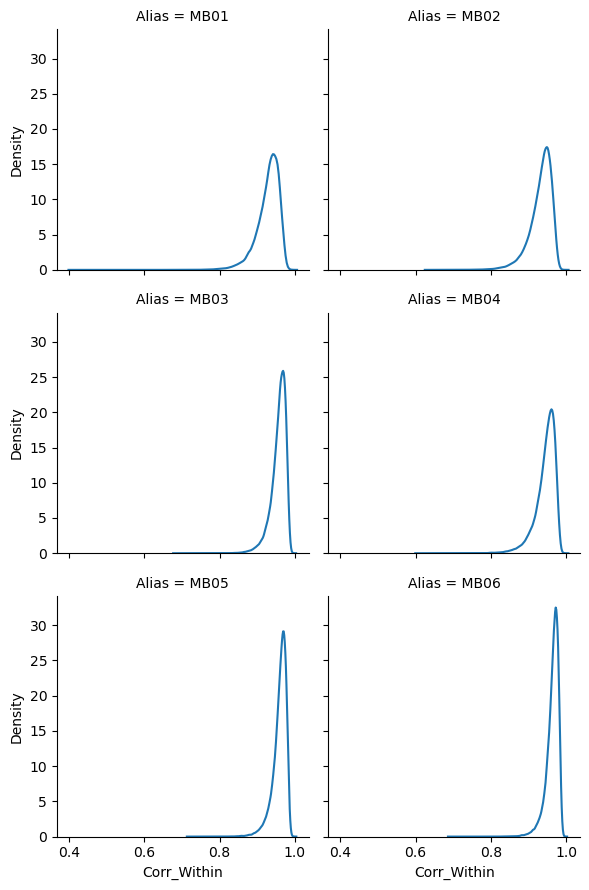

In [75]:
g = sns.FacetGrid(gene_results.reset_index(), col="Alias", col_wrap=2)
g.map_dataframe(sns.kdeplot, x="Corr_Within")